In [1]:
import numpy as np
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.cm as cm

Loading the MNIST Digits dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [3]:
yy = np.random.randint(low=0, high=59999, size=1)
yy

array([50094])

In [4]:
no = np.random.randint(low=0, high=59999, size=1)[0]
no

41798

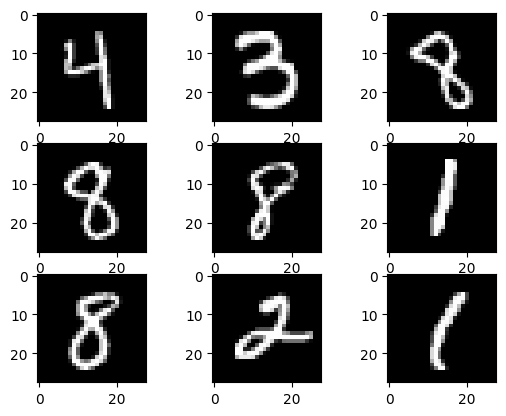

In [5]:
for i in range(9):
	# define subplot
	no = np.random.randint(low=0, high=59999, size=1)[0]
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(X_train[no], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [6]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
tf.random.set_seed( seed = 2024 )
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 28x28 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')  
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 2704)              0         
                                                                 
 dense (Dense)               (None, 512)               1384960   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               102600    
                                                        

In [10]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics = ['acc'])

In [11]:
history = model.fit(x=X_train,y=y_train,
                              validation_data=(X_test,y_test),
                              steps_per_epoch=50,epochs=100,
                              validation_steps=50,
                              verbose=2, callbacks=[monitor])

Epoch 1/100
50/50 - 124s - loss: 17.7615 - acc: 0.7199 - val_loss: 0.5210 - val_acc: 0.8921 - 124s/epoch - 2s/step
Epoch 2/100
50/50 - 43s - loss: 1.1881 - acc: 0.8326 - val_loss: 4.4385 - val_acc: 0.5972 - 43s/epoch - 866ms/step
Epoch 3/100
50/50 - 40s - loss: 0.4543 - acc: 0.9103 - val_loss: 0.1589 - val_acc: 0.9556 - 40s/epoch - 795ms/step
Epoch 4/100
50/50 - 40s - loss: 0.1827 - acc: 0.9504 - val_loss: 0.0972 - val_acc: 0.9732 - 40s/epoch - 793ms/step
Epoch 5/100
50/50 - 38s - loss: 0.1007 - acc: 0.9717 - val_loss: 0.0611 - val_acc: 0.9820 - 38s/epoch - 754ms/step
Epoch 6/100
50/50 - 40s - loss: 0.0647 - acc: 0.9811 - val_loss: 0.0828 - val_acc: 0.9765 - 40s/epoch - 809ms/step
Epoch 7/100
50/50 - 36s - loss: 0.0500 - acc: 0.9848 - val_loss: 0.0690 - val_acc: 0.9816 - 36s/epoch - 721ms/step
Epoch 8/100
50/50 - 37s - loss: 0.0372 - acc: 0.9887 - val_loss: 0.0639 - val_acc: 0.9819 - 37s/epoch - 744ms/step
Epoch 9/100
50/50 - 69s - loss: 0.0265 - acc: 0.9914 - val_loss: 0.0784 - val_ac

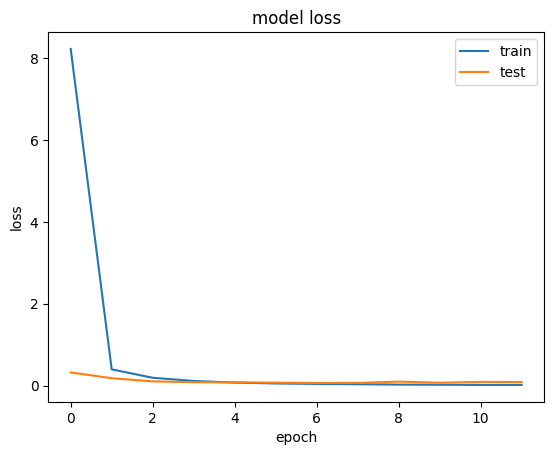

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [14]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]) 

Test loss: 0.06224754452705383
Test accuracy: 0.9829000234603882
